# Clustering simples

Tendo em mãos os nomes dos países e o centro geográfico (em lat/long) destes, vou utilizar a metodologia de clustering para agrupa-los em dois e sete clusters (quero ver os continentes!).
Esse foi um exercício do curso do The Data Science Course 2020: Complete Data Science Bootcamp (Udemy)

## Importando bibliotecas relevantes

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #gráficos seaborn <3

from sklearn.cluster import KMeans #método K-Means Clustering

## Carregando os dados

In [27]:
data = pd.read_csv("Countries-exercise.csv")
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plotagem dos dados

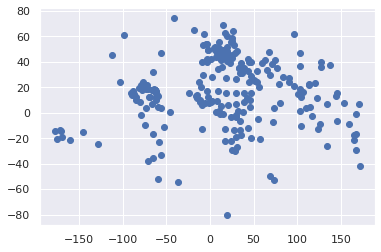

In [28]:
plt.scatter(data['Longitude'],data['Latitude']) #ai que bonitinho!

## Selecionar as features

Criar uma cópia dos dados (atribuido para x) com apenas Lat e Long, pq eles vão ser meus features

In [29]:
x = data.iloc[:,1:3] #remover a primeira coluna do dataframe
#iloc(row indices,column indices)
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assumindo apenas 2 clusters

In [14]:
kmeans = KMeans(2) #agora kmeans é um objeto

In [16]:
kmeans.fit(x) #aplica o kmeans aos dados x (só lat e long)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Resutls

In [17]:
clusters = kmeans.fit_predict(x) #ver cada cluster (1 ou 0) de cada observação
clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [20]:
data_clusters = data.copy() #criando uma copia dos dados iniciais
data_clusters['Cluster'] = clusters #adicionando uma coluna com os clusters encontrados
data_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

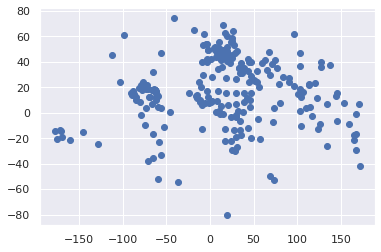

In [21]:
plt.scatter(data_clusters['Longitude'],data_clusters['Latitude']) #bom, mesmo grafico de antes

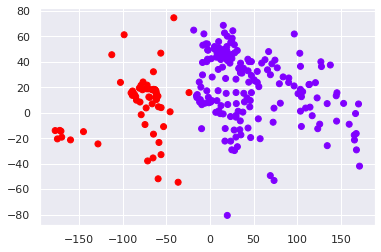

In [25]:
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c=data_clusters['Cluster'], cmap='rainbow')

Bom, parece que o mapa está dividido em dois: leste e oeste :)
Vou tentar com 7, pra ver os continentes rs.

In [31]:
kmeans7 = KMeans(7) 
kmeans7.fit(x) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
clusters7 = kmeans7.fit_predict(x)
clusters7 #olha os 7 clusters de 0 a 6

array([0, 3, 1, 0, 5, 5, 5, 3, 0, 3, 4, 1, 2, 1, 0, 2, 5, 3, 1, 5, 6, 6,
       3, 5, 3, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 2, 3, 1, 6, 5, 0, 3, 6, 6,
       1, 6, 4, 0, 1, 6, 0, 0, 0, 0, 5, 5, 5, 5, 1, 0, 5, 0, 6, 0, 5, 1,
       5, 5, 1, 5, 2, 0, 5, 5, 2, 6, 5, 3, 5, 6, 6, 6, 6, 6, 5, 0, 5, 0,
       2, 0, 2, 1, 0, 5, 0, 5, 2, 5, 3, 2, 1, 5, 3, 3, 5, 5, 5, 0, 5, 5,
       2, 3, 3, 1, 3, 2, 0, 0, 2, 5, 3, 2, 5, 6, 5, 0, 5, 3, 1, 5, 5, 5,
       2, 0, 6, 5, 5, 1, 3, 0, 2, 5, 6, 5, 3, 5, 3, 2, 1, 6, 0, 1, 1, 2,
       1, 2, 6, 2, 6, 0, 4, 5, 5, 3, 2, 2, 3, 3, 0, 4, 0, 2, 2, 2, 5, 0,
       2, 5, 0, 5, 4, 3, 5, 3, 1, 6, 3, 1, 1, 6, 2, 6, 6, 2, 6, 0, 5, 1,
       1, 0, 5, 6, 0, 5, 5, 5, 1, 0, 1, 5, 0, 6, 6, 2, 3, 3, 2, 4, 0, 5,
       5, 2, 1, 1, 5, 0, 0, 3, 5, 0, 0, 0, 0, 2, 2, 4, 4, 3, 1, 1, 1],
      dtype=int32)

In [33]:
data_clusters7 = data.copy()
data_clusters7['Cluster'] = clusters7 #adicionando uma coluna com os clusters encontrados
data_clusters7

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,5
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


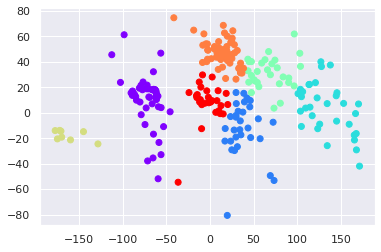

In [34]:
plt.scatter(data_clusters7['Longitude'], data_clusters7['Latitude'], c=data_clusters7['Cluster'], cmap='rainbow')

Oxi, mas num deu o que eu esperava, rs.